# Requirements

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.



In [ ]:
df = pd.read_csv('/content/sample_data/mental_health_diagnosis_treatment_data.csv')
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Sleep Quality (1-10)',
       'Physical Activity (hrs/week)', 'Medication', 'Therapy Type',
       'Treatment Start Date', 'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)',
       'AI-Detected Emotional State', 'Adherence to Treatment (%)'],
      dtype='object')

Preprocess the input and the output variables appropriately.


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

categorical_cols = ['Gender', 'Diagnosis', 'Medication', 'Therapy Type', 'AI-Detected Emotional State']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

df_encoded['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'])

scaler = StandardScaler()
numerical_cols = ['Age', 'Symptom Severity (1-10)', 'Mood Score (1-10)',
                  'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
                  'Treatment Duration (weeks)', 'Stress Level (1-10)',
                  'Treatment Progress (1-10)', 'Adherence to Treatment (%)']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

label_encoder = LabelEncoder()
df_encoded['Outcome'] = label_encoder.fit_transform(df['Outcome'])

df_encoded.columns

Index(['Patient ID', 'Age', 'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Treatment Start Date', 'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)',
       'Adherence to Treatment (%)', 'Gender_Female', 'Gender_Male',
       'Gender_Other', 'Diagnosis_Anxiety', 'Diagnosis_Bipolar Disorder',
       'Diagnosis_Depression', 'Medication_Antidepressant', 'Medication_None',
       'Medication_SSRI', 'Therapy Type_CBT', 'Therapy Type_DBT',
       'Therapy Type_None', 'AI-Detected Emotional State_Negative',
       'AI-Detected Emotional State_Neutral',
       'AI-Detected Emotional State_Positive'],
      dtype='object')

Explore the dataset using visualizations of your choice.

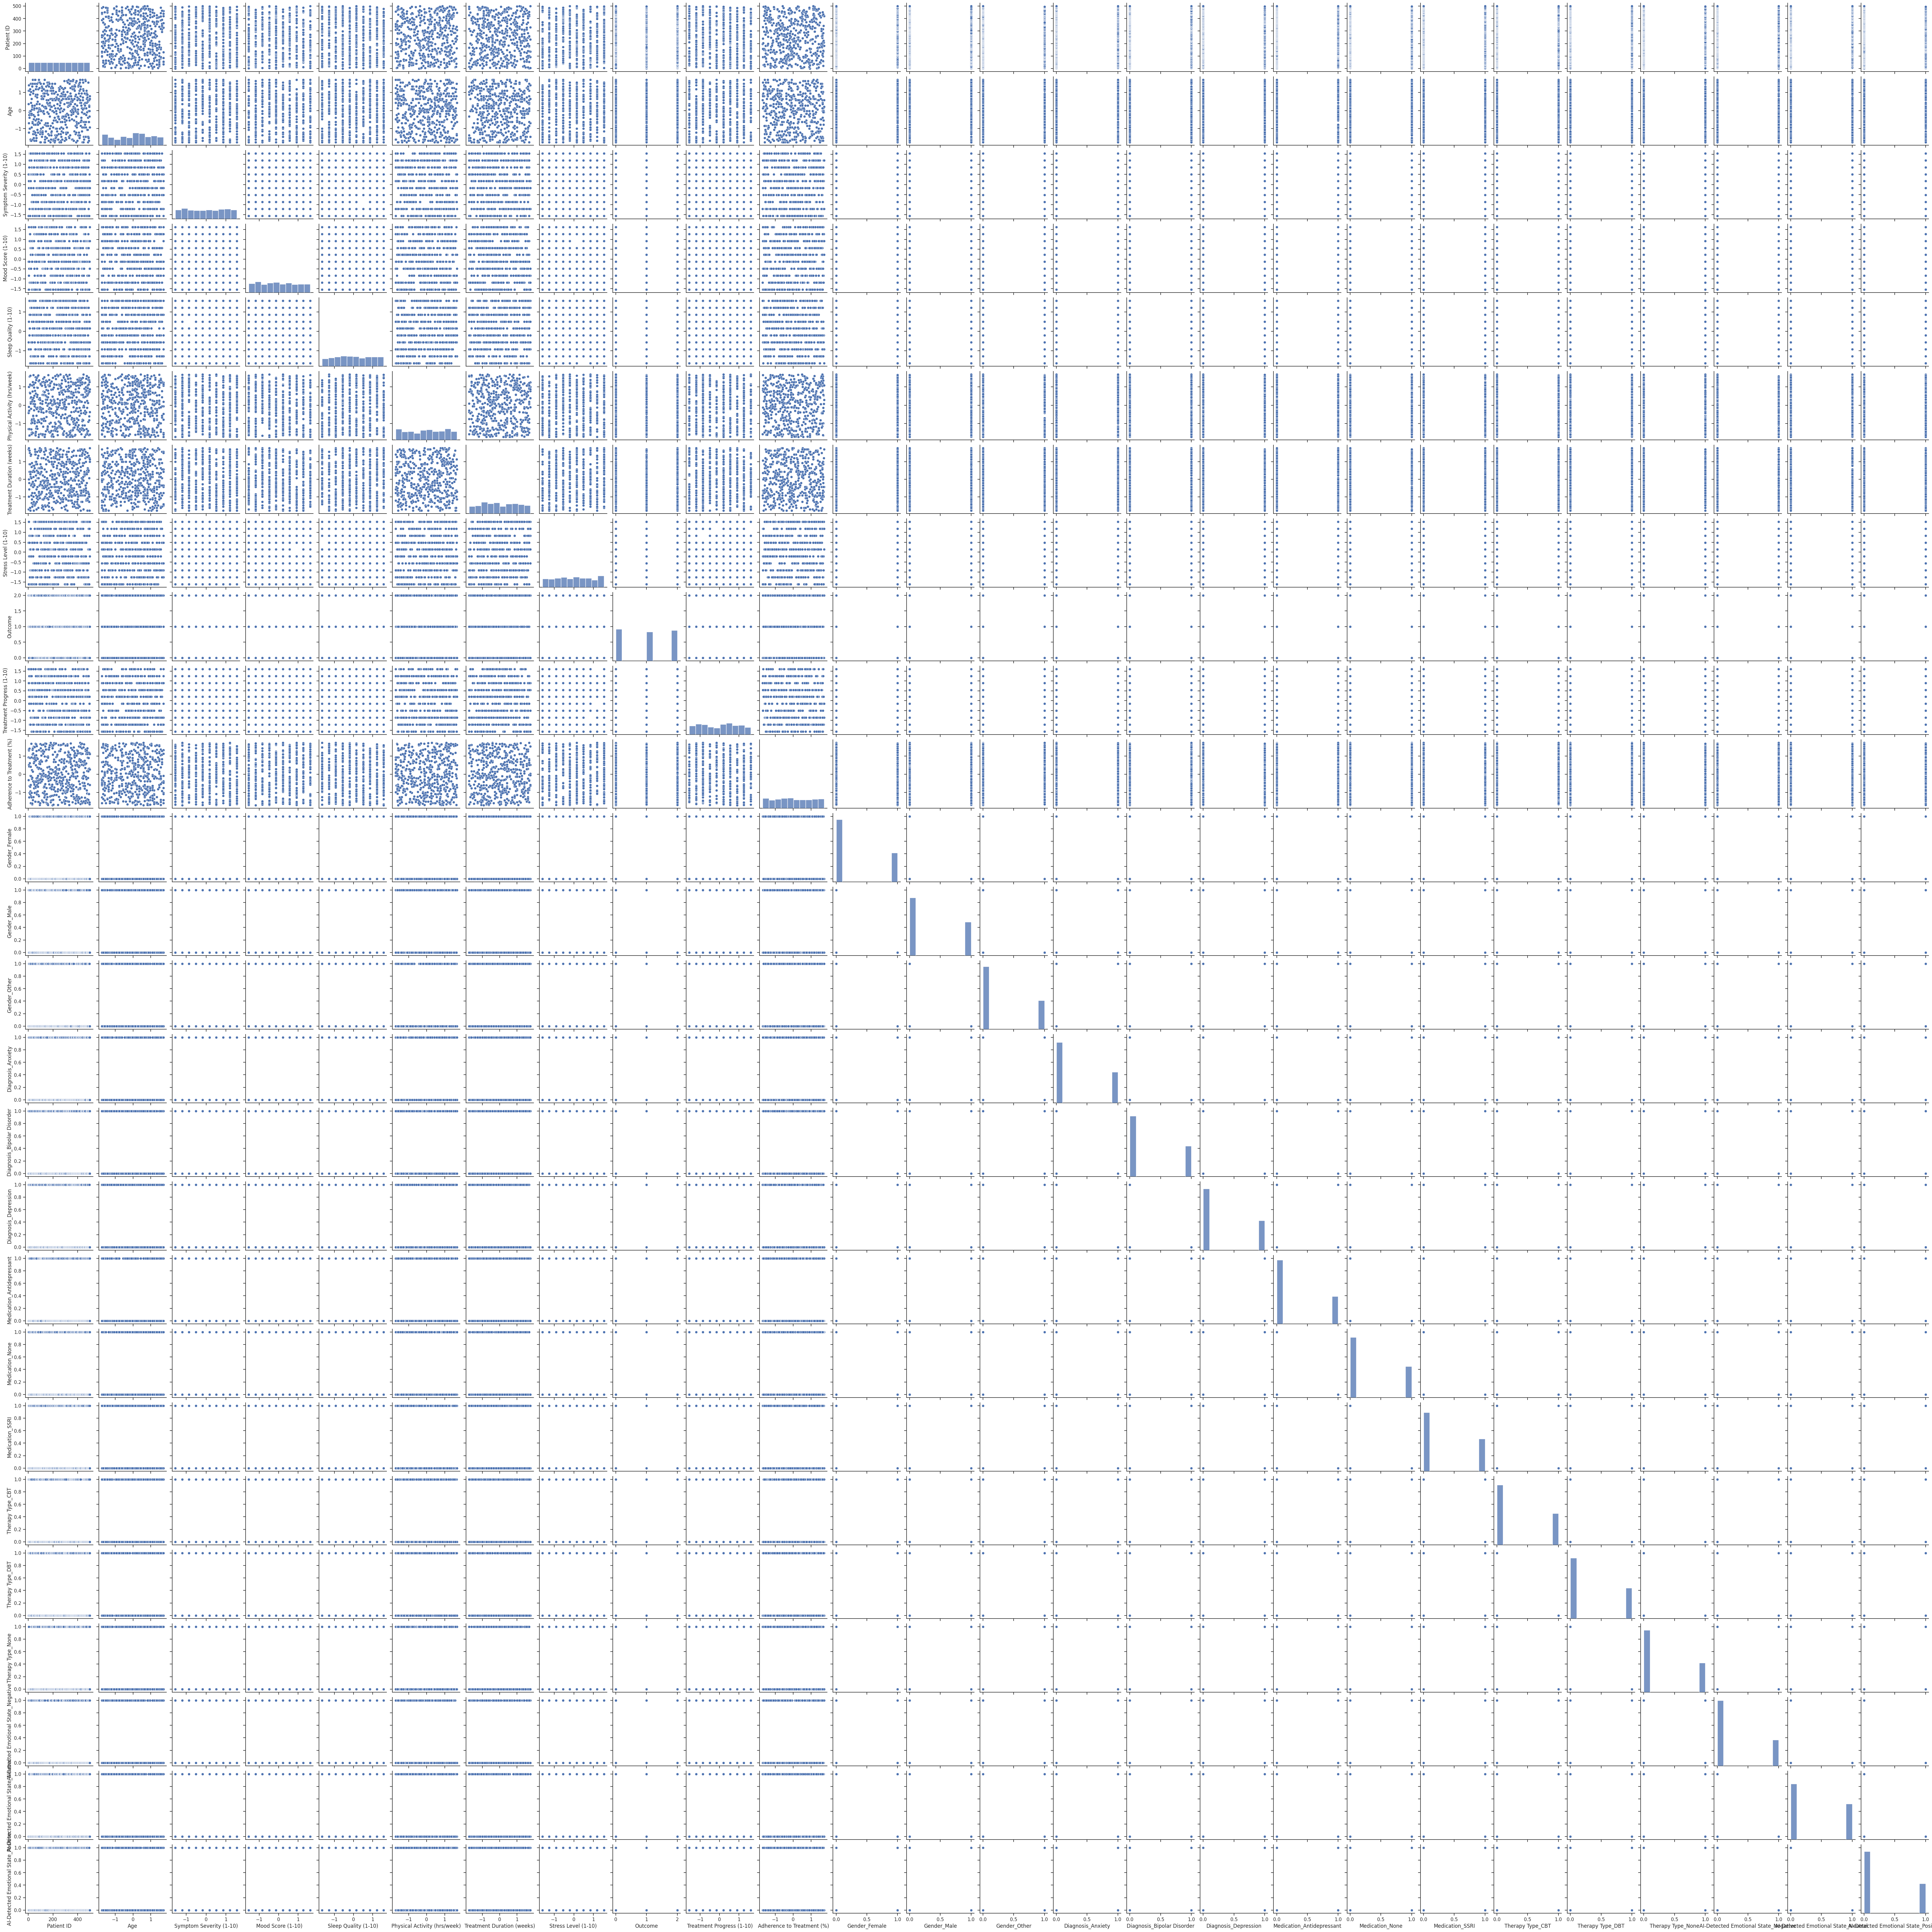

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df_encoded)
plt.show()

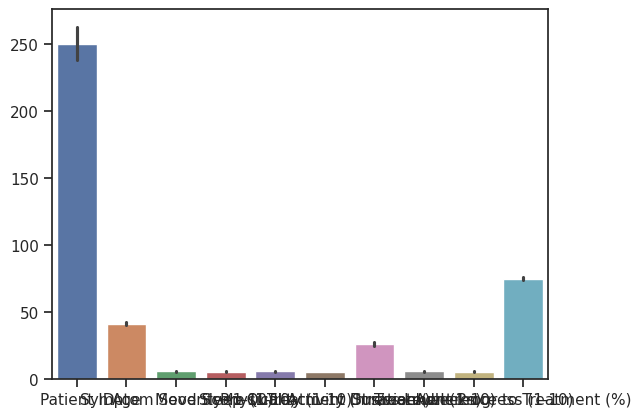

In [ ]:
sns.barplot(df)
plt.show()

Check if the dataset is balanced.

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient ID                            500 non-null    int64  
 1   Age                                   500 non-null    float64
 2   Symptom Severity (1-10)               500 non-null    float64
 3   Mood Score (1-10)                     500 non-null    float64
 4   Sleep Quality (1-10)                  500 non-null    float64
 5   Physical Activity (hrs/week)          500 non-null    float64
 6   Treatment Duration (weeks)            500 non-null    float64
 7   Stress Level (1-10)                   500 non-null    float64
 8   Outcome                               500 non-null    int64  
 9   Treatment Progress (1-10)             500 non-null    float64
 10  Adherence to Treatment (%)            500 non-null    float64
 11  Gender_Female      

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) *100

print(missing_values)
print('')
print('Percentage')
print(missing_percentage)

Patient ID                        0
Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

Percentage
Patient ID                       0.0
Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                  

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

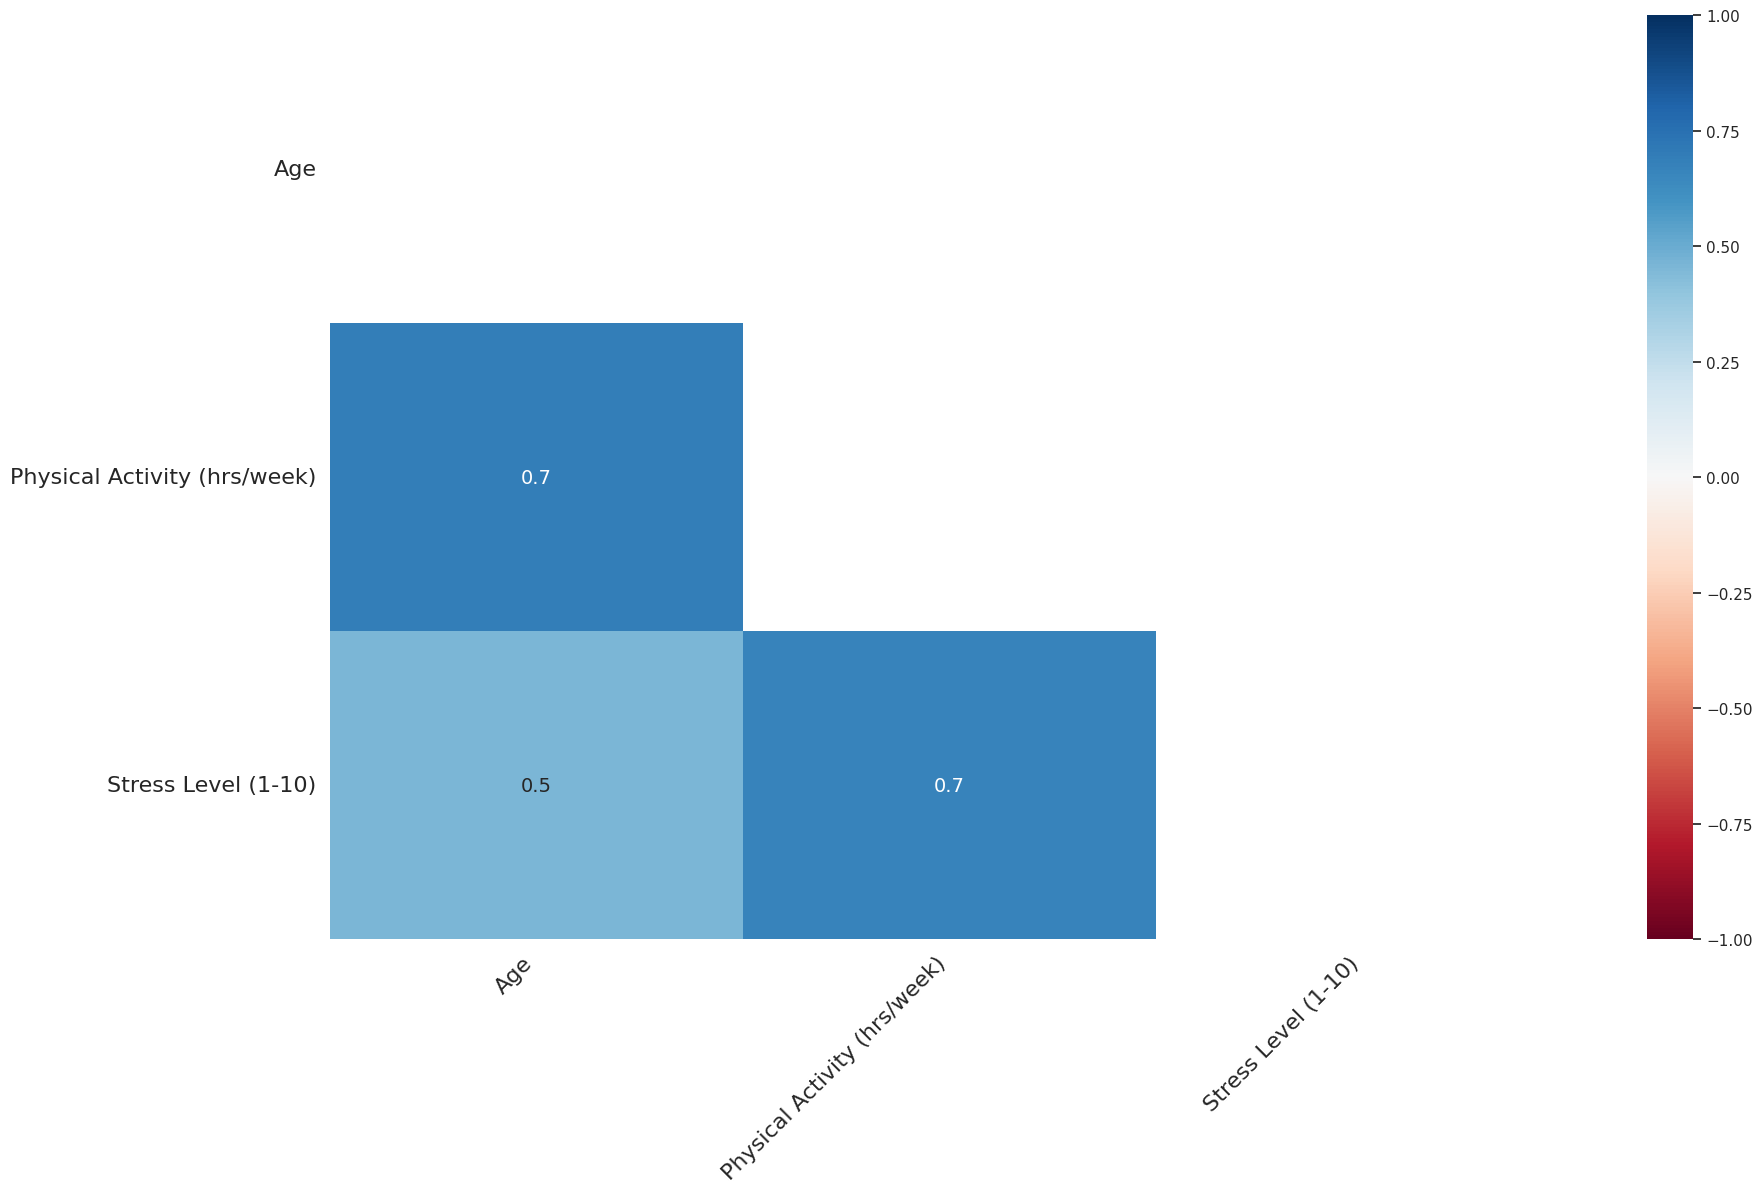

In [ ]:
msno.heatmap(df)
plt.show()

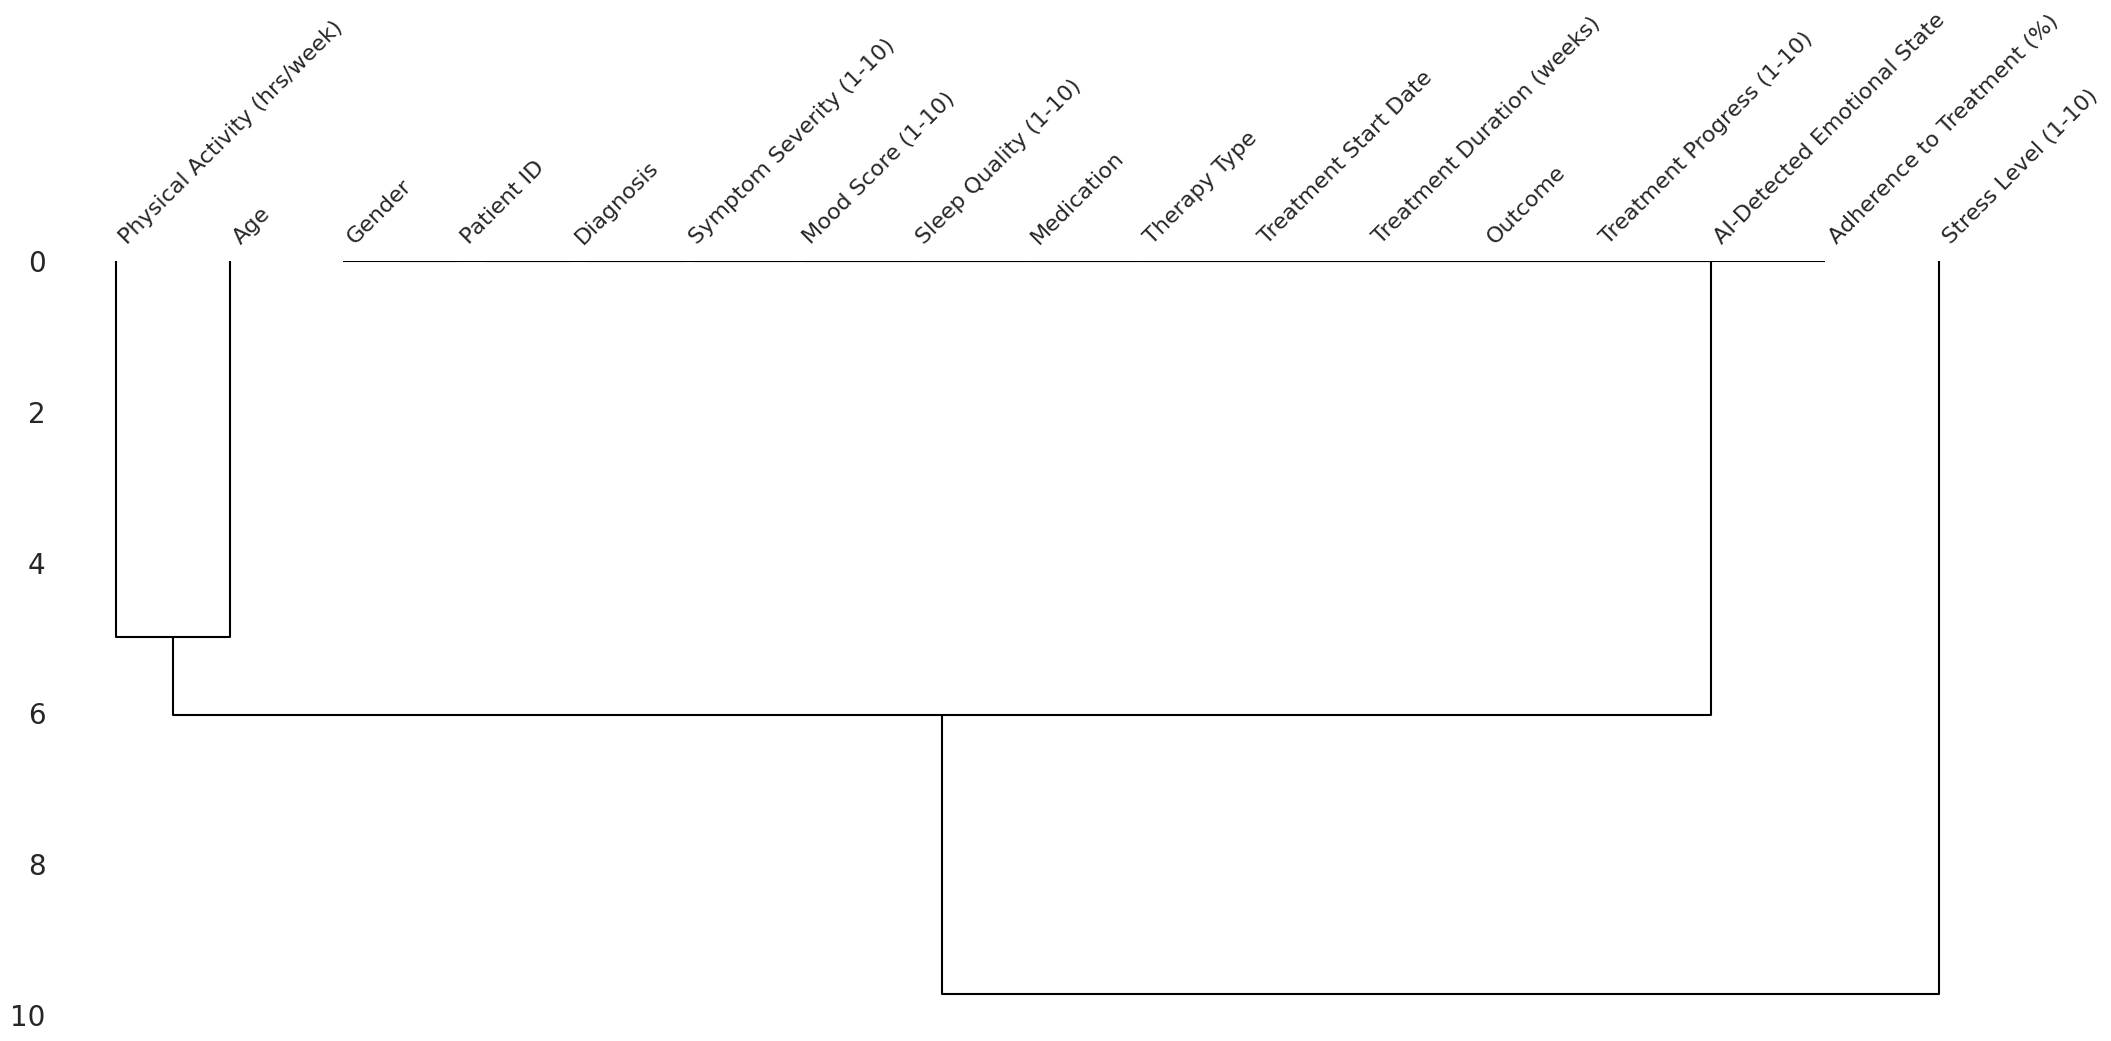

In [ ]:
msno.dendrogram(df)
plt.show()

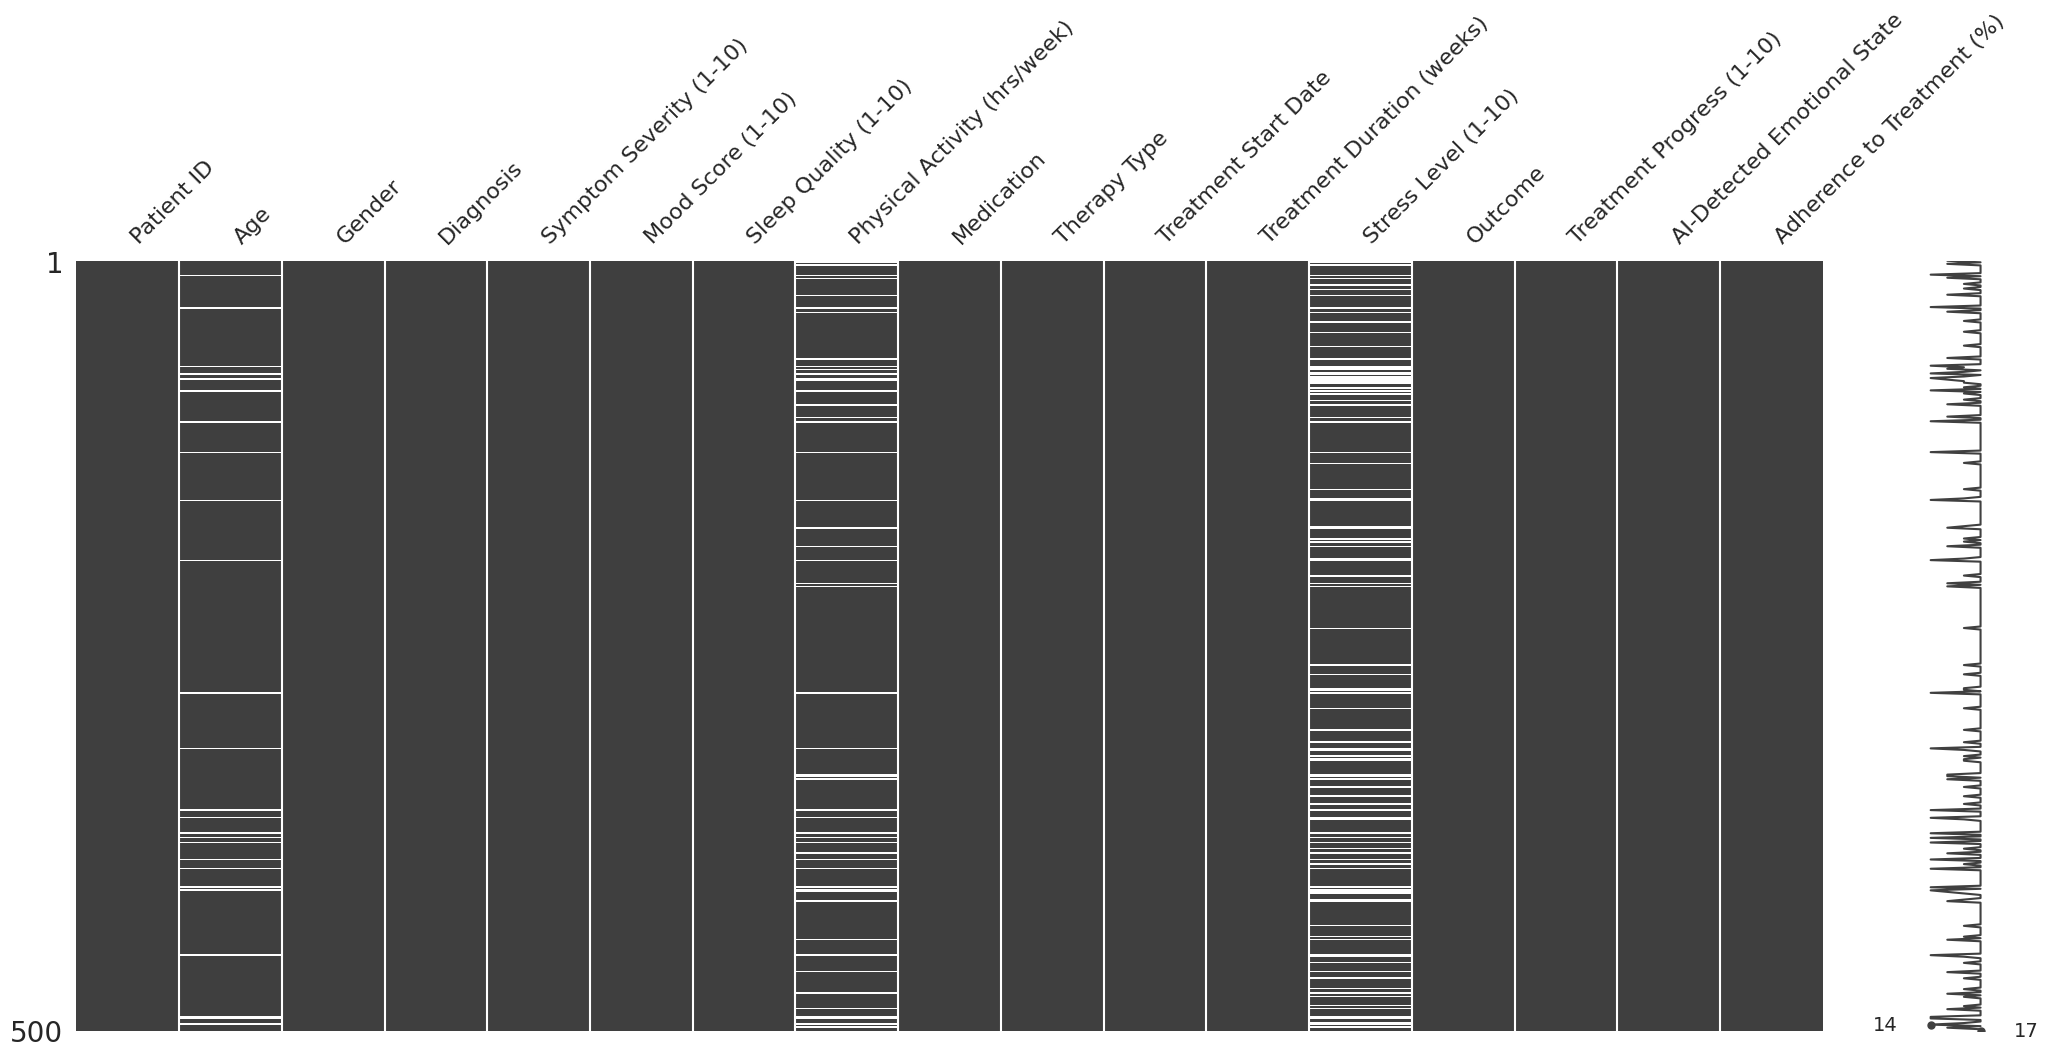

In [ ]:
msno.matrix(df)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Physical Activity (hrs/week)'] = df['Physical Activity (hrs/week)'].fillna(df['Physical Activity (hrs/week)'].median())
df['Stress Level (1-10)'] = df['Stress Level (1-10)'].fillna(df['Stress Level (1-10)'].median())

df.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Diagnosis,0
Symptom Severity (1-10),0
Mood Score (1-10),0
Sleep Quality (1-10),0
Physical Activity (hrs/week),0
Medication,0
Therapy Type,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
X = df_encoded.drop(columns=['Outcome', 'Patient ID', 'Treatment Start Date'])
y = (df_encoded['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
scaler = StandardScaler()

numerical_features = ['Age', 'Symptom Severity (1-10)', 'Mood Score (1-10)',
                      'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
                      'Treatment Duration (weeks)', 'Stress Level (1-10)',
                      'Treatment Progress (1-10)', 'Adherence to Treatment (%)']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.describe(), X_test.describe()

(                Age  Symptom Severity (1-10)  Mood Score (1-10)  \
 count  4.000000e+02             4.000000e+02       4.000000e+02   
 mean  -1.243450e-16            -1.065814e-16      -2.997602e-17   
 std    1.001252e+00             1.001252e+00       1.001252e+00   
 min   -1.620918e+00            -1.422107e+00      -1.506311e+00   
 25%   -8.197723e-01            -8.320213e-01      -9.132754e-01   
 50%   -9.874120e-02            -2.419353e-01       2.727965e-01   
 75%    8.626336e-01             9.382368e-01       8.658325e-01   
 max    1.743894e+00             1.528323e+00       1.458868e+00   
 
        Sleep Quality (1-10)  Physical Activity (hrs/week)  \
 count          4.000000e+02                  4.000000e+02   
 mean           2.242651e-16                 -9.769963e-17   
 std            1.001252e+00                  1.001252e+00   
 min           -1.461299e+00                 -1.538827e+00   
 25%           -8.666704e-01                 -8.272306e-01   
 50%          

## Model Selection

**Choose** and train an approriate model for the given task.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_encoded = pd.get_dummies(X, columns=['Gender', 'Diagnosis', 'Medication', 'Therapy Type', 'AI-Detected Emotional State'])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = rf_model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=LabelEncoder().fit(df['Outcome']).classes_)

print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", report)

Accuracy: 0.29

Classification Report:
               precision    recall  f1-score   support

Deteriorated       0.36      0.49      0.41        37
    Improved       0.27      0.16      0.20        37
   No Change       0.18      0.19      0.19        26

    accuracy                           0.29       100
   macro avg       0.27      0.28      0.27       100
weighted avg       0.28      0.29      0.28       100



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.